In [56]:
import numpy as np
import pandas as pd
import configparser
import time, datetime
from glob import glob
pd.set_option('precision', 9)
from scipy.optimize import brute

import talib
%matplotlib inline

In [74]:
d_path = "G:\Code\Projects\Quant Mod\Robots\Moonbot"
ff = glob(d_path +'/*')
df = pd.read_csv(ff[-1], sep = '\t')
df.groupby(['ChannelName ']).sum()


,BuyPrice,SellPrice,SpentBTC,GainedBTC,ProfitBTC
ChannelName,,,,,
(strategy <DRO-106-new-flat>),0.00002447,0.00002455,0.00499438,0.00500570,0.00001132
(strategy <Delta 01>),0.00000884,0.00000885,0.00392692,0.00392744,0.00000051
(strategy <Dr101>),0.00483216,0.00486603,0.07992985,0.08041957,0.00048973
Manual,0.00001713,0.00001731,0.00935766,0.00944653,0.00008888
MoonShot: (strategy <MoonShot109>),0.00902878,0.00905503,0.11796500,0.11852019,0.00055518
MoonShot: (strategy <Sho-107-test>),0.06141377,0.06156549,0.17363260,0.17384473,0.00021211
MoonShot: (strategy <TestShoot777>),0.00323294,0.00324876,0.00971451,0.00988681,0.00017229


In [3]:
import ffn
%matplotlib inline

In [4]:
num_days = 1000
data = (np.random.randn(num_days) + np.random.uniform(low=0.0, high=0.2, size=num_days))
index = pd.date_range('01/01/2010',periods=num_days, freq='D')
data = pd.DataFrame(data,index=index,columns=['Returns'])
data['Equity'] = data.cumsum() + 100
data.iloc[0] = 100
perf = data['Equity'].calc_stats()
type(perf)

ffn.core.PerformanceStats

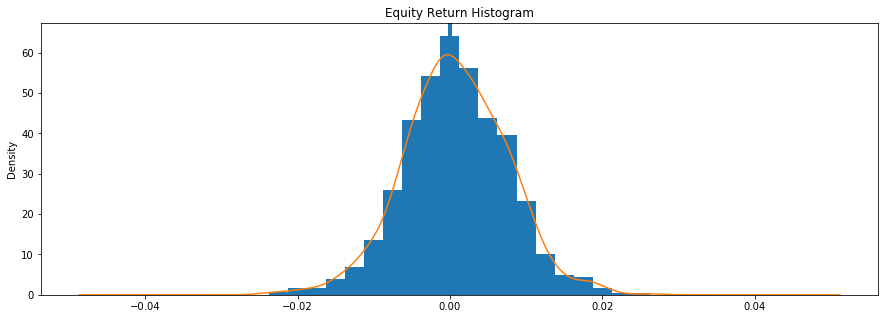

In [7]:
perf.plot_histogram()

In [8]:
perf.stats

start                2010-01-01 00:00:00
end                  2012-09-26 00:00:00
rf                                     0
total_return                  1.11514863
daily_sharpe                  1.80134629
daily_sortino                 2.94419545
cagr                         0.315072542
max_drawdown                -0.107184472
calmar                        2.93953533
mtd                         0.0117792641
three_month                 0.0253631084
six_month                   0.0673374949
ytd                          0.137682879
one_year                     0.261135258
five_year                            NaN
daily_mean                   0.194882422
daily_vol                    0.108187095
daily_skew                 -0.0305679127
daily_kurt                   0.508048866
best_day                    0.0262176215
worst_day                  -0.0237146837
monthly_sharpe                2.15060796
monthly_sortino               4.22371843
monthly_mean                 0.262487419
monthly_vol     

In [215]:
def trade_statistics(trade_data, init_data):
    #trade statistics        
    profit = trade_data.iloc[-1]['cum_profit']       

    s = trade_data['signal']
    trades = s[s==2].shape[0] 
    
    ts = [init_data['market'], init_data['kline'], profit, trades]
    return ts
    
def fo(params):
    window = params[0]
    buy = params[1]
    sell = params[2]
    
    signals = rsi_01(prices, window, buy, sell) 
    ts = simulation(prices, signals, init_data)
    ts = trade_statistics(ts, init_data)
    
    results.append(ts + ['#'] + params.tolist() )
    return 0

timeframes = ['1m', '3m', '5m', '15m', '24m', '30m', '1h']
timeframes = ['5m']
init_data = {'exchange_commision': 0.0015,
             'start_capital'     : 0.1,
             'buy_correction'    : 1.004,
             'sell_correction'   : 0.996,
             'robot_name'        : 'rsi-01',
             'market'            : '',
             'kline'             : ''  
            }
markets = glob(data_path + '/BTC/*-BTC')

start_time = time.time()
for kline in timeframes:
    init_data['kline'] =  kline
    print(kline)
    results = []
    for market_path in markets:
        market = market_path.split('\\')[-1]
        init_data['market'] =  market
        print('\t', market)

        files = glob(market_path +  '/' + kline + '/' + '*csv') 
        df = pd.read_csv(files[-1])
        prices = df['C'].as_matrix()
        
        fo(14,30,70)
        #brute(fo, ((5,20,1), (30,38,2), (50,80,2)), finish=None)     
        xx = pd.DataFrame(results)
        xx.to_csv('Logs/mass_backtest_' + kline + '.csv', index = False)
end_time = time.time()

print(round(end_time-start_time)/60, ' min')
results = pd.DataFrame(results)
results.columns = ['market','kline','profit','ntrades','delim','window','buy', 'sell']

NCASH-BTC
TRX-BTC
NCASH-BTC
TRX-BTC
NCASH-BTC
TRX-BTC
NCASH-BTC
TRX-BTC
NCASH-BTC
TRX-BTC
NCASH-BTC
TRX-BTC
NCASH-BTC
TRX-BTC
16.816666666666666  min


In [213]:
xx = results [results['profit'] > 0]
print('Всего результатов: ', xx.shape[0])
xx.groupby('market').sum()

Всего результатов:  272


,profit,ntrades,window,buy,sell
market,,,,,
NCASH-BTC,0.128380576,399,466,830,1842
TRX-BTC,17.219753948,20583,4088,7912,16356


In [ ]:

import plotly
plotly.__version__
import plotly.offline as py_offline
import plotly.graph_objs as go
py_offline.init_notebook_mode()

candle = go.Candlestick(x=df['T'],open=df['O'],high=df['H'],low=df['L'],close=df['C'],
                        increasing=dict(line=dict(color= '#17BECF')),
                        decreasing=dict(line=dict(color= '#9E254C')))

data = [candle]

py_offline.plot(data, filename=data_path + '/' + 'Temp/candle_stick.html')